In [36]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('../input/b7-dataset/MINOR PROJECT')

print (dataset_path)

print("Types of classes labels found: ", len(dataset_path))

['Normal', 'Consolidation']
Types of classes labels found:  2


In [37]:
class_labels = []

for item in dataset_path:
    # Get all the file names
    all_classes = os.listdir('../input/b7-dataset/MINOR PROJECT' + '/' +item)
    #print(all_classes)

    # Add them to the list
    for room in all_classes:
        class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
        #print(class_labels[:5])
# print(class_labels)

In [38]:
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])

In [39]:
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  2043
Normal           1027
Consolidation    1016
Name: Labels, dtype: int64


In [40]:
import cv2
path = '../input/b7-dataset/MINOR PROJECT'
dataset_path = os.listdir('../input/b7-dataset/MINOR PROJECT')

im_size = 300

images = []
labels = []

for i in dataset_path:
    data_path = path+'/' + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
#         print(img.shape)
        
        images.append(img)
        labels.append(i)

In [41]:
images = np.array(images)
# print(images[0])
images = images.astype('float32') / 255.0
# print(images[0])
images.shape

(2043, 300, 300, 3)

In [42]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
# print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
# print (y)

In [43]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
# print(Y[:5])
# print(Y[35:])

In [44]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB3

NUM_CLASSES = 2
IMG_SIZE = 300
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB3(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [45]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.25, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1532, 300, 300, 3)
(1532, 2)
(511, 300, 300, 3)
(511, 2)


In [46]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=30, verbose=2)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
efficientnetb3 (Functional)  (None, 2)                 10786609  
Total params: 10,786,609
Trainable params: 10,699,306
Non-trainable params: 87,303
_________________________________________________________________
Epoch 1/30


2022-04-29 05:09:53.527378: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.05GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-04-29 05:09:53.868454: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-04-29 05:09:53.980227: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-04-29 05:09:54.656074: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Alloc

48/48 - 48s - loss: 3.0088 - accuracy: 0.5418
Epoch 2/30
48/48 - 34s - loss: 1.7522 - accuracy: 0.5725
Epoch 3/30
48/48 - 34s - loss: 1.3673 - accuracy: 0.5849
Epoch 4/30
48/48 - 34s - loss: 1.0314 - accuracy: 0.6371
Epoch 5/30
48/48 - 34s - loss: 0.8718 - accuracy: 0.6580
Epoch 6/30
48/48 - 34s - loss: 0.8026 - accuracy: 0.6736
Epoch 7/30
48/48 - 34s - loss: 0.7767 - accuracy: 0.6860
Epoch 8/30
48/48 - 34s - loss: 0.7263 - accuracy: 0.6899
Epoch 9/30
48/48 - 34s - loss: 0.7268 - accuracy: 0.7285
Epoch 10/30
48/48 - 34s - loss: 0.7195 - accuracy: 0.7167
Epoch 11/30
48/48 - 34s - loss: 0.7410 - accuracy: 0.7148
Epoch 12/30
48/48 - 34s - loss: 0.7421 - accuracy: 0.7330
Epoch 13/30
48/48 - 34s - loss: 0.7569 - accuracy: 0.7037
Epoch 14/30
48/48 - 34s - loss: 0.7925 - accuracy: 0.7128
Epoch 15/30
48/48 - 34s - loss: 0.7196 - accuracy: 0.6860
Epoch 16/30
48/48 - 34s - loss: 0.7243 - accuracy: 0.6795
Epoch 17/30
48/48 - 34s - loss: 0.6333 - accuracy: 0.7043
Epoch 18/30
48/48 - 34s - loss: 0.

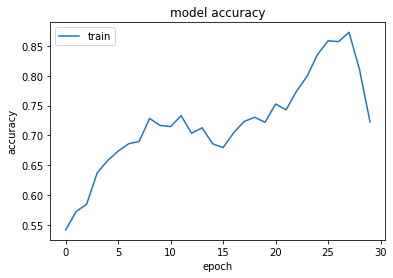

In [47]:
import matplotlib.pyplot as plt

plt.plot(hist.history["accuracy"])
# plt.plot(hist.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()


In [48]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

15/16 [===========================>..] - ETA: 0s - loss: 11.2523 - accuracy: 0.4896

2022-04-29 05:26:46.731969: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.21GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


16/16 [==============================] - 4s 150ms/step - loss: 10.9529 - accuracy: 0.4971
Loss = 10.952937126159668
Test Accuracy = 0.49706459045410156


2022-04-29 05:26:47.068406: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.07GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


Input image shape: (1, 300, 300, 3)


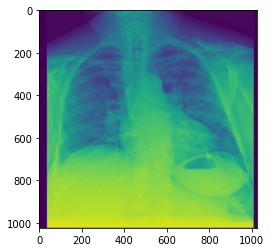

In [49]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '../input/b7-dataset/MINOR PROJECT/Consolidation/00000242_000.png'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (300, 300))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [50]:
preds=model.predict(x)
preds = preds.reshape(1,-1)

In [51]:
preds

array([[1., 0.]], dtype=float32)

In [52]:
class ChannelAttention(tf.keras.layers.Layer):
      def _init_(self, filters, ratio):
        super(ChannelAttention, self)._init_()
        self.filters = filters
        self.ratio = ratio

        def build(self, input_shape):
            self.shared_layer_one = tf.keras.layers.Dense(self.filters//self.ratio,
                             activation='relu', kernel_initializer='he_normal', 
                              use_bias=True, 
                              bias_initializer='zeros')
            self.shared_layer_two = tf.keras.layers.Dense(self.filters,
                             kernel_initializer='he_normal',
                             use_bias=True,
                             bias_initializer='zeros')

        def call(self, inputs):
            # AvgPool
            avg_pool = tf.keras.layers.GlobalAveragePooling2D()(inputs)
            

            avg_pool = self.shared_layer_one(avg_pool)
            avg_pool = self.shared_layer_two(avg_pool)

            # MaxPool
#             max_pool = tf.keras.layers.GlobalMaxPooling2D()(inputs)
#             max_pool = tf.keras.layers.Reshape((1,1,filters))(max_pool)

#             max_pool = shared_layer_one(max_pool)
#             max_pool = shared_layer_two(max_pool)


            attention = tf.keras.layers.Add()([avg_pool,max_pool])
            attention = tf.keras.layers.Activation('sigmoid')(attention)
            
            return tf.keras.layers.Multiply()([inputs, attention])

In [53]:
class SpatialAttention(tf.keras.layers.Layer):
      def _init_(self, kernel_size):
        super(SpatialAttention, self)._init_()
        self.kernel_size = kernel_size
        
        def build(self, input_shape):
            self.conv2d = tf.keras.layers.Conv2D(filters = 1,
                    kernel_size=self.kernel_size,
                    strides=1,
                    padding='same',
                    activation='sigmoid',
                    kernel_initializer='he_normal',
                    use_bias=False)

        def call(self, inputs):
            
            # AvgPool
            avg_pool = tf.keras.layers.Lambda(lambda x: tf.keras.backend.mean(x, axis=3, keepdims=True))(inputs)
            
            # MaxPool
#             max_pool = tf.keras.layers.Lambda(lambda x: tf.keras.backend.max(x, axis=3, keepdims=True))(inputs)

            attention = tf.keras.layers.Concatenate(axis=3)([avg_pool, max_pool])

            attention = self.conv2d(attention)


            return tf.keras.layers.multiply([inputs, attention])

In [54]:
# # simple_cnn_no_attention = tf.keras.models.Sequential([
# #     tf.keras.layers.Conv2D(32, 3, input_shape=train_x.shape[1:], activation='elu', padding='same'),   
# #     tf.keras.layers.BatchNormalization(),
# #     tf.keras.layers.Conv2D(32, 3, padding='same', activation='elu'),
# #     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
# #     tf.keras.layers.Conv2D(64, 3, padding='same', activation='elu'),
# #     tf.keras.layers.BatchNormalization(),
# #     tf.keras.layers.Conv2D(64, 3, padding='same', activation='elu'),
# #     tf.keras.layers.BatchNormalization(),
# #     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
# #     tf.keras.layers.Conv2D(128, 3, padding='same', activation='elu'),
# #     tf.keras.layers.BatchNormalization(),
# #     tf.keras.layers.Conv2D(128, 3, padding='same', activation='elu'),
# #     tf.keras.layers.GlobalAveragePooling2D(),
# #     tf.keras.layers.Dense(2, activation='softmax' )
# # ])
# efnb3 = EfficientNetB3(weights=None, include_top=False, input_shape=train_x.shape[1:], classes=2)
# simple_cnn_no_attention = tf.keras.models.Sequential()
# simple_cnn_no_attention.add(efnb3)
# simple_cnn_no_attention.add(tf.keras.layers.Conv2D(32, 3, input_shape= train_x.shape[1:], activation='elu', padding='same'))
# simple_cnn_no_attention.add( tf.keras.layers.BatchNormalization())
# simple_cnn_no_attention.add( tf.keras.layers.Conv2D(32, 3, padding='same', activation='elu'))
# simple_cnn_no_attention.add( tf.keras.layers.BatchNormalization())
# simple_cnn_no_attention.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# simple_cnn_no_attention.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='elu'))
# simple_cnn_no_attention.add(tf.keras.layers.BatchNormalization())
# simple_cnn_no_attention.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='elu'))
# simple_cnn_no_attention.add(tf.keras.layers.BatchNormalization())
# simple_cnn_no_attention.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# simple_cnn_no_attention.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='elu'),)

# simple_cnn_no_attention.add(tf.keras.layers.BatchNormalization())

# simple_cnn_no_attention.add( tf.keras.layers.Conv2D(128, 3, padding='same', activation='elu'))

# simple_cnn_no_attention.add(tf.keras.layers.GlobalAveragePooling2D())

# simple_cnn_no_attention.add(tf.keras.layers.Dense(2, activation='softmax' ))


In [55]:
# simple_cnn_no_attention.summary()

In [56]:
# simple_cnn_no_attention.compile(
#     loss='categorical_crossentropy',
#     optimizer=tf.keras.optimizers.Adam(0.001),
#     metrics=['accuracy'],
# )

In [57]:
# history = simple_cnn_no_attention.fit(train_x, train_y, epochs=30)

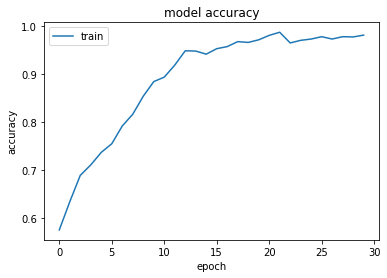

In [58]:
plt.plot(history.history["accuracy"])
# plt.plot(hist.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()


In [59]:
print(f"Test accuracy: {simple_cnn_no_attention.evaluate(test_x,test_y)[1]}")

16/16 [==============================] - 2s 132ms/step - loss: 0.5280 - accuracy: 0.8611
Test accuracy: 0.8610567450523376


In [60]:
efnb3 = EfficientNetB3(weights=None, include_top=False, input_shape=train_x.shape[1:], classes=2)
simple_cnn_with_attention = tf.keras.models.Sequential()
simple_cnn_with_attention.add(efnb3)
simple_cnn_with_attention.add(tf.keras.layers.Conv2D(32, 3, input_shape= train_x.shape[1:], activation='elu', padding='same'))
simple_cnn_with_attention.add( tf.keras.layers.BatchNormalization())
simple_cnn_with_attention.add( tf.keras.layers.Conv2D(32, 3, padding='same', activation='elu'))
simple_cnn_with_attention.add( tf.keras.layers.BatchNormalization())
simple_cnn_with_attention.add( ChannelAttention())
simple_cnn_with_attention.add(SpatialAttention())
simple_cnn_with_attention.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
simple_cnn_with_attention.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='elu'))
simple_cnn_with_attention.add(tf.keras.layers.BatchNormalization())
simple_cnn_with_attention.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='elu'))
simple_cnn_with_attention.add(tf.keras.layers.BatchNormalization())
simple_cnn_with_attention.add(ChannelAttention())
simple_cnn_with_attention.add(SpatialAttention())
simple_cnn_with_attention.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
simple_cnn_with_attention.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='elu'),)

simple_cnn_with_attention.add(tf.keras.layers.BatchNormalization())

simple_cnn_with_attention.add( tf.keras.layers.Conv2D(128, 3, padding='same', activation='elu'))

simple_cnn_with_attention.add(ChannelAttention())

simple_cnn_with_attention.add(SpatialAttention())

simple_cnn_with_attention.add(tf.keras.layers.GlobalAveragePooling2D())

simple_cnn_with_attention.add(tf.keras.layers.Dense(2, activation='softmax' ))


In [61]:
simple_cnn_with_attention.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb3 (Functional)  (None, 10, 10, 1536)      10783535  
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 32)        442400    
_________________________________________________________________
batch_normalization_10 (Batc (None, 10, 10, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 10, 10, 32)        128       
_________________________________________________________________
channel_attention_3 (Channel (None, 10, 10, 32)        0         
_________________________________________________________________
spatial_attention_3 (Spatial (None, 10, 10, 32)       

In [62]:
simple_cnn_with_attention.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

In [63]:
history = simple_cnn_with_attention.fit(train_x, train_y, epochs=30)

Epoch 1/30
48/48 [==============================] - 50s 743ms/step - loss: 0.7760 - accuracy: 0.5966
Epoch 2/30
48/48 [==============================] - 35s 735ms/step - loss: 0.6490 - accuracy: 0.6664
Epoch 3/30
48/48 [==============================] - 35s 738ms/step - loss: 0.6197 - accuracy: 0.6815
Epoch 4/30
48/48 [==============================] - 35s 739ms/step - loss: 0.6017 - accuracy: 0.7023
Epoch 5/30
48/48 [==============================] - 35s 738ms/step - loss: 0.5432 - accuracy: 0.7422
Epoch 6/30
48/48 [==============================] - 35s 740ms/step - loss: 0.5209 - accuracy: 0.7500
Epoch 7/30
48/48 [==============================] - 35s 736ms/step - loss: 0.4600 - accuracy: 0.7924
Epoch 8/30
48/48 [==============================] - 36s 744ms/step - loss: 0.4569 - accuracy: 0.7937
Epoch 9/30
48/48 [==============================] - 36s 748ms/step - loss: 0.4058 - accuracy: 0.8296
Epoch 10/30
48/48 [==============================] - 35s 739ms/step - loss: 0.3024 - accura

In [64]:
print(f"Test accuracy: {simple_cnn_with_attention.evaluate(test_x,test_y)[1]}")

16/16 [==============================] - 4s 134ms/step - loss: 1.9312 - accuracy: 0.6556
Test accuracy: 0.6555773019790649


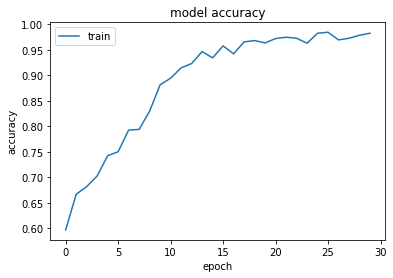

In [65]:
plt.plot(history.history["accuracy"])
# plt.plot(hist.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()